Validate function inputs with Fiatlight
=======================================

With Fiatlight attribute (`xxx_validate_value`)
-----------------------------------------------

Within flatlight, all functions inputs can optionally be validated before the function is executed.

Step 1: we use the `@fl.with_fiat_attributes` decorator to add custom attributes to the function.
        (note: we could also use `fl.add_fiat_attributes` to add custom attributes to a function later on)

Step 2: inside the custom attributes, we can define validation functions for each parameter: for a parameter named "x", the custom attribute must be named "x__validate_value".

> *Note: pay attention to the double underscore in the custom attribute name.*


Step 3: this custom attribute must reference a function that take the value of the parameter as input and throws a ValueError if the value is not valid, with a nice error message, which will be displayed to the user.

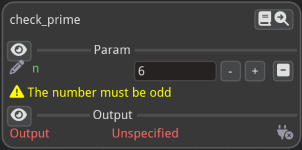

In [3]:
import fiatlight as fl


def validate_odd_number(n: int) -> None:
    if n % 2 == 0:
        raise ValueError("The number must be odd")


@fl.with_fiat_attributes(n__validate_value = validate_odd_number)
def check_prime(n: int) -> bool:
    """Check if a number is prime. For performance reasons, we refuse even numbers.
    """
    if n % 2 == 0:
        raise ValueError("Even numbers are not allowed")
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

fl.run(check_prime, app_name="check_prime")

With pydantic validators
-------------------------

When using pydantic BaseModel, you can use the `@field_validator` decorator to add validation functions to the fields of the model. The error messages will be displayed to the user.

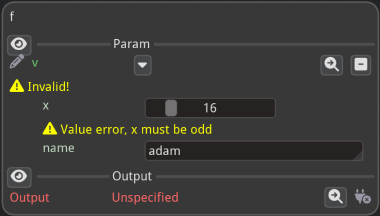

In [5]:
import fiatlight as fl
from pydantic import BaseModel, Field, field_validator


@fl.base_model_with_gui_registration()
class MyData(BaseModel):
    # This field should be between 0 and 99 inclusive
    x: int = Field(default=1, ge=0, lt=100)
    name: str = "adam"

    @field_validator("x")
    @classmethod
    def check_x(cls, v: int) -> int:
        if v % 2 == 0:
            raise ValueError("x must be odd")
        return v

    @field_validator("name")
    @classmethod
    def check_name(cls, v: str) -> str:
        if not v.islower():
            raise ValueError("name must be lowercase")
        return v


def f(v: MyData) -> MyData:
    return v


fl.run(f, app_name="Pydantic validation")